<a href="https://colab.research.google.com/github/Minh-A/Bitcoin_fluctuation_prediction/blob/main/Fluctuation_Prediction_Beta1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 생성

In [ ]:
# 라이브러리 임포트
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')

import matplotlib.pyplot as plt

from tqdm import tqdm

import tensorflow as tf

In [ ]:
# a1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/bnk/데이터/미국소비자물가지수(CPI)_출처_네이버금융.csv', encoding='cp949')
a2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/bnk/데이터/환율.csv', encoding='cp949')
bit = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/bnk/데이터/업비트.csv', encoding='cp949')
a4 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/bnk/데이터/바이낸스.csv', encoding='cp949')
# a5 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/bnk/데이터/국제금시세.xls')
a6 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/bnk/데이터/크립토퀀트_Coinbase price.xls')
a7 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/bnk/데이터/크립토퀀트_GBTC premium.xls')
a8 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/bnk/데이터/크립토퀀트_GBTC price.xls')
a9 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/bnk/데이터/크립토퀀트_NVT Golden Cross.xls')
a10 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/bnk/데이터/크립토퀀트_Stock to Flow.xls')
a11 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/bnk/데이터/크립토퀀트_Puell multiful.xls')
a12 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/bnk/데이터/크립토퀀트_SSR.xls')
a13 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/bnk/데이터/크립토퀀트_MPI.xls')
a14 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/bnk/데이터/크립토퀀트_All_Miner_Out.xls')
a15 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/bnk/데이터/크립토퀀트_All_Outflow.xls')
a16 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/bnk/데이터/크립토퀀트_All_Inflow.xls')
# a17 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/bnk/데이터/크립토퀀트_Derivative_reserve.xls')
a18 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/bnk/데이터/크립토퀀트_All_Netflow.xls')
# a19 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/bnk/데이터/크립토퀀트_Spot_reserve.xls')
# a20 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/bnk/데이터/크립토퀀트_Coinbase_reserve.xls')
# a21 =pd.read_excel('/content/drive/MyDrive/Colab Notebooks/bnk/데이터/크립토퀀트_All_Exchange_reserve.xls')
# a22 =pd.read_excel('/content/drive/MyDrive/Colab Notebooks/bnk/데이터/크립토 공포 탐욕 지수.xls')
# a23 =pd.read_excel('/content/drive/MyDrive/Colab Notebooks/bnk/데이터/크립토퀀트_Binance_reserve.xls')

con = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/bnk/데이터/6개 merge.csv', encoding='cp949')

In [ ]:
a2.head(3)

,항목명1,원/달러(시가),원/달러(고가),원/달러(저가),원/달러(종가)
0,2018-02-01,"1,068.50","1,074.00","1,068.50","1,071.90"
1,2018-02-02,"1,071.00","1,081.10","1,070.70","1,079.70"
2,2018-02-05,"1,090.00","1,093.00","1,087.60","1,088.50"


In [ ]:
bit = bit.iloc[:,1:]
bit.head(3)

,Unnamed: 1,Unnamed: 2,open,high,low,close,Up/Down,전일대비,증감률,volume,value,MA(5),WMA(5),중심선,상한선,하한선,%B,band width,전일대비.1,상승분,하락분,AU,AD,RS,RSI,12EMA,26EMA,MACD,MACD 시그널,%K,%D
0,2018-02-01,2018-02-01 9:00,"11,439,000","11,490,000","10,011,000","10,070,000",Down,"-1,359,000",-11.89%,"22,226","236,864,009,093","11,877,400","11,341,133","12,472,700","14,525,823",1.041958e+07,-0.09,0.33,"-1,359,000",0,1359000,261666.6667,642666.6667,0.407157676,28.93475857,"12,957,482","15,148,589","-2,191,106","-1,901,065",1.657769,16.048295
1,2018-02-02,2018-02-02 9:00,"10,061,000","10,120,000","7,830,000","9,410,000",Down,"-660,000",-6.55%,"52,018","465,637,634,476","11,089,000","10,518,667","12,099,600","14,788,820",9.410380e+06,0.00,0.44,"-660,000",0,660000,238000.0000,645142.8571,0.36891054,26.94920738,"12,411,716","14,723,508","-2,311,792","-1,983,211",27.920127,20.679488
2,2018-02-03,2018-02-03 9:00,"9,410,000","10,200,000","8,400,000","9,520,000",Up,"110,000",1.17%,"25,406","235,540,121,102","10,411,200","9,995,667","11,706,600","14,630,024",8.783176e+06,0.13,0.50,"110,000",110000,0,195333.3333,673166.6667,0.290170834,22.49088467,"11,966,837","14,338,063","-2,371,226","-2,060,814",32.962746,20.846881


In [ ]:
a4.head(3)

,datetime,open,high,low,close,volume,환률,원화환산
0,2018-02-01,"10,285.10","10,335.00","8,750.99","9,224.52","33,565","1,072","9,888,685"
1,2018-02-02,"9,224.52","9,250.00","8,010.02","8,873.03","49,972","1,080","9,582,872"
2,2018-02-03,"8,873.03","9,473.01","8,229.00","9,199.96","28,725","1,080","9,935,957"


In [ ]:
a5 = a5.iloc[:,1:]
a5.head(3)

,파실 때,보내실 때,받으실 때
0,1867.5,29.6,+1.61%
1,1837.9,14.1,+0.77%
2,1823.8,1.2,+0.06%


In [ ]:
a6 = a6.iloc[:,1:]
a6.head(3)

,date,open,high,low,close,volume,소비자물가지수,등락,등락률
0,2021-05-17,46450.78,46646.15,42101.0,43580.50,43660.222084,267.05,1,2.18
1,2021-05-16,46771.01,49808.28,43825.0,46450.79,30655.330647,267.05,1,2.18
2,2021-05-15,49893.48,50730.58,46573.0,46775.51,21936.114547,267.05,1,2.18


In [ ]:
a7 = a7.iloc[:,1:]
a7.head(3)

,date,market_premium
0,2021-05-20,-13.532829
1,2021-05-19,-5.795098
2,2021-05-18,-14.944413


In [ ]:
a8 = a8.iloc[:,1:]
a8.head(3)

,date,price_usd_open,price_usd_high,price_usd_low,price_usd_close,price_usd_adj_close
0,2021-05-20,35.37,35.95,32.02,33.0499,33.0499
1,2021-05-19,28.80,33.84,28.00,32.6000,32.6000
2,2021-05-18,35.02,35.20,34.00,34.3800,34.3800


In [ ]:
a9 = a9.iloc[:,1:]
a9.head(3)

,date,nvt_golden_cross
0,2021-05-20,-1.649811
1,2021-05-19,-0.959358
2,2021-05-18,0.130799


In [ ]:
a10 = a10.iloc[:,1:]
a10.head(3)

,date,stock_to_flow,stock_to_flow_reversion
0,2021-05-20,26735.244897,1.516307
1,2021-05-19,23953.883427,1.532133
2,2021-05-18,29941.104284,1.431659


In [ ]:
a11 = a11.iloc[:,1:]
a11.head(3)

,date,puell_multiple
0,2021-05-20,1.217663
1,2021-05-19,1.294371
2,2021-05-18,1.127553


In [ ]:
a12 = a12.iloc[:,1:]
a12.head(3)

,date,stablecoin_supply_ratio
0,2021-05-20,14.411379
1,2021-05-19,13.186939
2,2021-05-18,15.639553


In [ ]:
a13 = a13.iloc[:,1:]
a13.head(3)

,date,mpi
0,2021-05-20,-0.264890
1,2021-05-19,0.202011
2,2021-05-18,-0.489228


In [ ]:
a14 = a14.iloc[:,1:]
a14.head(3)

,date,outflow_total,outflow_top10,outflow_mean,outflow_mean_ma7
0,2021-05-20,139.384542,139.384542,23.230757,24.291071
1,2021-05-19,131.102998,131.102998,32.775750,24.826302
2,2021-05-18,125.187461,125.187461,31.296865,20.786378


In [ ]:
a15 = a15.iloc[:,1:]
a15.head(3)

,date,reserve,reserve_usd
0,2021-05-20,1.302305e+06,5.279390e+10
1,2021-05-19,1.294922e+06,4.752435e+10
2,2021-05-18,1.296709e+06,5.558403e+10


In [ ]:
a16 = a16.iloc[:,1:]
a16.head(3)

,date,reserve,reserve_usd
0,2021-05-20,1.302305e+06,5.279390e+10
1,2021-05-19,1.294922e+06,4.752435e+10
2,2021-05-18,1.296709e+06,5.558403e+10


## 데이터 합치기

1차 데이터 합치기 (6번부터 16까지)

In [ ]:
a6_16 = pd.merge(a6, a7, how='left', on='date')

for i in range(9):
  i += 8
  aabb = globals()["a{}".format(i)]

  a6_16 = pd.merge(a6_16, aabb, how='left', on='date')

In [ ]:
a6_16

,date,open,high,low,close,volume,소비자물가지수,등락,등락률,market_premium,price_usd_open,price_usd_high,price_usd_low,price_usd_close,price_usd_adj_close,nvt_golden_cross,stock_to_flow,stock_to_flow_reversion,puell_multiple,stablecoin_supply_ratio,mpi,outflow_total,outflow_top10,outflow_mean,outflow_mean_ma7,reserve_x,reserve_usd_x,reserve_y,reserve_usd_y
0,2021-05-17,46450.78,46646.15,42101.00,43580.50,43660.222084,267.05,1,2.18,-13.574590,35.27,36.25,33.76,35.500,35.500,0.699712,24743.887838,1.760352,1.361891,15.936986,-0.578574,123.432888,123.432888,24.686578,16.438485,1.296740e+06,5.648334e+10,1.296740e+06,5.648334e+10
1,2021-05-16,46771.01,49808.28,43825.00,46450.79,30655.330647,267.05,1,2.18,NaN,NaN,NaN,NaN,NaN,NaN,0.728484,22680.980518,2.047102,1.548839,17.366997,-0.660113,136.720889,136.720889,19.531556,19.066282,1.278611e+06,5.936626e+10,1.278611e+06,5.936626e+10
2,2021-05-15,49893.48,50730.58,46573.00,46775.51,21936.114547,267.05,1,2.18,NaN,NaN,NaN,NaN,NaN,NaN,0.838678,24339.491288,1.921099,1.510604,17.473819,-0.690489,133.074438,133.074438,19.010634,20.430060,1.275133e+06,5.962342e+10,1.275133e+06,5.962342e+10
3,2021-05-14,49682.28,51569.56,48895.00,49893.48,21987.793624,267.05,1,2.18,-16.190744,39.01,40.50,39.01,39.430,39.430,0.972867,22340.555436,2.232801,1.702148,18.707802,-0.465309,156.042859,156.042859,19.505357,26.236585,1.269391e+06,6.331977e+10,1.269391e+06,6.331977e+10
4,2021-05-13,49498.76,52500.00,46000.00,49690.11,42250.087408,267.05,1,2.18,-20.647055,38.34,40.13,34.90,37.182,37.182,0.879260,18593.170363,2.671787,2.012601,18.792036,-0.257674,161.864237,161.864237,26.977373,31.949754,1.261852e+06,6.268501e+10,1.261852e+06,6.268501e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1197,2018-02-05,8167.90,8349.16,6425.75,6905.19,59578.698221,247.87,1,1.34,53.121239,10.96,11.12,9.60,10.050,10.050,-1.508322,7285.703698,0.951111,1.577575,50.401685,-0.850115,174.774570,126.968730,0.693550,3.528467,7.011784e+05,4.858823e+09,7.011784e+05,4.858823e+09
1198,2018-02-04,9227.80,9350.00,7859.00,8167.91,24062.181957,247.87,1,1.34,NaN,NaN,NaN,NaN,NaN,NaN,-1.121999,7571.180807,1.085739,1.693366,59.564491,-0.495010,1653.312875,1625.669332,5.134512,3.639219,6.818639e+05,5.605143e+09,6.818639e+05,5.605143e+09
1199,2018-02-03,8787.52,9499.00,8115.48,9240.00,23700.985090,247.87,1,1.34,NaN,NaN,NaN,NaN,NaN,NaN,-0.999548,8528.431542,1.067254,1.583934,67.256738,-0.947008,145.367410,122.518562,0.685695,3.184920,6.595497e+05,6.003224e+09,6.595497e+05,6.003224e+09
1200,2018-02-02,9014.22,9090.08,7540.00,8787.52,52039.268077,247.87,1,1.34,42.721911,11.89,13.10,11.64,12.000,12.000,-1.198093,8019.846331,1.103221,1.719647,64.552097,-0.615347,946.366655,890.894902,6.267329,3.326606,6.615659e+05,5.853314e+09,6.615659e+05,5.853314e+09


2차 데이터 합치기 (1번부터 5번까지)

In [ ]:
# a1_3 = pd.merge(a1, a2, how='left', left_on= '날짜2', right_on= "항목명1")

In [ ]:
# a1_3.head(3)

In [ ]:
a1_3 = pd.merge(a2, bit, how='right', left_on= '항목명1', right_on= "Unnamed: 1")

In [ ]:
a1_3 = a1_3.drop(columns=["Unnamed: 1", "Unnamed: 2"])

In [ ]:
a1_3

,항목명1,원/달러(시가),원/달러(고가),원/달러(저가),원/달러(종가),open,high,low,close,Up/Down,전일대비,증감률,volume,value,MA(5),WMA(5),중심선,상한선,하한선,%B,band width,전일대비.1,상승분,하락분,AU,AD,RS,RSI,12EMA,26EMA,MACD,MACD 시그널,%K,%D
0,2018-02-01,"1,068.50","1,074.00","1,068.50","1,071.90","11,439,000","11,490,000","10,011,000","10,070,000",Down,"-1,359,000",-11.89%,"22,226","236,864,009,093","11,877,400","11,341,133","12,472,700","14,525,823",1.041958e+07,-0.09,0.33,"-1,359,000",0,1359000,2.616667e+05,6.426667e+05,0.407157676,28.93475857,"12,957,482","15,148,589","-2,191,106","-1,901,065",1.657769,16.048295
1,2018-02-02,"1,071.00","1,081.10","1,070.70","1,079.70","10,061,000","10,120,000","7,830,000","9,410,000",Down,"-660,000",-6.55%,"52,018","465,637,634,476","11,089,000","10,518,667","12,099,600","14,788,820",9.410380e+06,0.00,0.44,"-660,000",0,660000,2.380000e+05,6.451429e+05,0.36891054,26.94920738,"12,411,716","14,723,508","-2,311,792","-1,983,211",27.920127,20.679488
2,NaN,NaN,NaN,NaN,NaN,"9,410,000","10,200,000","8,400,000","9,520,000",Up,"110,000",1.17%,"25,406","235,540,121,102","10,411,200","9,995,667","11,706,600","14,630,024",8.783176e+06,0.13,0.50,"110,000",110000,0,1.953333e+05,6.731667e+05,0.290170834,22.49088467,"11,966,837","14,338,063","-2,371,226","-2,060,814",32.962746,20.846881
3,NaN,NaN,NaN,NaN,NaN,"9,524,000","10,158,000","8,765,000","8,900,000",Down,"-620,000",-6.51%,"18,781","178,483,940,514","9,865,800","9,491,933","11,299,300","14,522,983",8.075617e+06,0.13,0.57,"-620,000",0,620000,1.953333e+05,7.603333e+05,0.256904866,20.43948378,"11,495,016","13,935,244","-2,440,228","-2,136,697",26.289926,29.057600
4,2018-02-05,"1,090.00","1,093.00","1,087.60","1,088.50","8,900,000","9,250,000","7,715,000","7,832,000",Down,"-1,068,000",-12.00%,"20,710","176,326,495,553","9,146,400","8,814,000","10,794,900","14,426,556",7.163244e+06,0.09,0.67,"-1,068,000",0,1068000,2.810000e+05,8.042857e+05,0.34937833,25.89179939,"10,931,475","13,483,151","-2,551,677","-2,219,693",3.099338,20.784003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1197,2021-05-13,"1,133.00","1,133.30","1,128.30","1,129.30","62,380,000","65,472,000","60,200,000","63,069,000",Up,"812,000",1.30%,"22,548","1,422,951,884,853","67,494,800","65,793,667","68,205,200","74,445,027",6.196537e+07,0.09,0.18,"812,000",812000,0,1.481750e+06,1.937400e+06,0.764813668,43.33679423,"67,426,421","68,211,988","-785,567","-498,318",22.190425,26.409802
1198,2021-05-14,"1,127.60","1,131.00","1,127.50","1,128.60","63,080,000","63,656,000","61,001,000","61,797,000",Down,"-1,272,000",-2.02%,"13,222","821,862,466,126","65,553,200","63,894,400","67,702,000","75,022,590",6.038141e+07,0.10,0.22,"-1,272,000",0,1272000,1.359000e+06,1.826500e+06,0.74404599,42.66206247,"66,560,356","67,736,804","-1,176,448","-633,944",13.026101,15.548754
1199,NaN,NaN,NaN,NaN,NaN,"61,795,000","62,118,000","57,900,000","58,807,000",Down,"-2,990,000",-4.84%,"17,508","1,058,971,203,969","63,134,200","61,645,667","66,714,800","75,712,543",5.771706e+07,0.06,0.27,"-2,990,000",0,2990000,1.994500e+06,1.992714e+06,1.000896122,50.02239301,"65,367,532","67,075,337","-1,707,805","-848,716",6.548736,13.921754
1200,NaN,NaN,NaN,NaN,NaN,"58,814,000","60,721,000","55,500,000","57,649,000",Down,"-1,158,000",-1.97%,"16,553","967,017,321,107","60,715,800","59,817,267","65,603,000","75,957,026",5.524897e+07,0.12,0.32,"-1,158,000",0,1158000,1.994500e+06,2.129000e+06,0.9368248,48.36910392,"64,180,066","66,377,090","-2,197,024","-1,118,378",14.327622,11.300820


In [ ]:
# a1_3.to_csv('/content/drive/MyDrive/Colab Notebooks/bnk/데이터/a1_3.csv', encoding='cp949')
a1_3 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/bnk/데이터/a1_3.csv', encoding='cp949')

In [ ]:
a1_3

,항목명1,원/달러(시가),원/달러(고가),원/달러(저가),원/달러(종가),open,high,low,close,Up/Down,전일대비,증감률,volume,value,MA(5),WMA(5),중심선,상한선,하한선,%B,band width,전일대비.1,상승분,하락분,AU,AD,RS,RSI,12EMA,26EMA,MACD,MACD 시그널,%K,%D
0,2018-02-01,"1,068.50","1,074.00","1,068.50","1,071.90","11,439,000","11,490,000","10,011,000","10,070,000",Down,"-1,359,000",-11.89%,"22,226","236,864,009,093","11,877,400","11,341,133","12,472,700","14,525,823",1.041958e+07,-0.09,0.33,"-1,359,000",0,1359000,2.616667e+05,6.426667e+05,0.407157676,28.93475857,"12,957,482","15,148,589","-2,191,106","-1,901,065",1.657769,16.048295
1,2018-02-02,"1,071.00","1,081.10","1,070.70","1,079.70","10,061,000","10,120,000","7,830,000","9,410,000",Down,"-660,000",-6.55%,"52,018","465,637,634,476","11,089,000","10,518,667","12,099,600","14,788,820",9.410380e+06,0.00,0.44,"-660,000",0,660000,2.380000e+05,6.451429e+05,0.36891054,26.94920738,"12,411,716","14,723,508","-2,311,792","-1,983,211",27.920127,20.679488
2,2018-02-03,"1,071.00","1,081.10","1,070.70","1,079.70","9,410,000","10,200,000","8,400,000","9,520,000",Up,"110,000",1.17%,"25,406","235,540,121,102","10,411,200","9,995,667","11,706,600","14,630,024",8.783176e+06,0.13,0.50,"110,000",110000,0,1.953333e+05,6.731667e+05,0.290170834,22.49088467,"11,966,837","14,338,063","-2,371,226","-2,060,814",32.962746,20.846881
3,2018-02-04,"1,071.00","1,081.10","1,070.70","1,079.70","9,524,000","10,158,000","8,765,000","8,900,000",Down,"-620,000",-6.51%,"18,781","178,483,940,514","9,865,800","9,491,933","11,299,300","14,522,983",8.075617e+06,0.13,0.57,"-620,000",0,620000,1.953333e+05,7.603333e+05,0.256904866,20.43948378,"11,495,016","13,935,244","-2,440,228","-2,136,697",26.289926,29.057600
4,2018-02-05,"1,090.00","1,093.00","1,087.60","1,088.50","8,900,000","9,250,000","7,715,000","7,832,000",Down,"-1,068,000",-12.00%,"20,710","176,326,495,553","9,146,400","8,814,000","10,794,900","14,426,556",7.163244e+06,0.09,0.67,"-1,068,000",0,1068000,2.810000e+05,8.042857e+05,0.34937833,25.89179939,"10,931,475","13,483,151","-2,551,677","-2,219,693",3.099338,20.784003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1197,2021-05-13,"1,133.00","1,133.30","1,128.30","1,129.30","62,380,000","65,472,000","60,200,000","63,069,000",Up,"812,000",1.30%,"22,548","1,422,951,884,853","67,494,800","65,793,667","68,205,200","74,445,027",6.196537e+07,0.09,0.18,"812,000",812000,0,1.481750e+06,1.937400e+06,0.764813668,43.33679423,"67,426,421","68,211,988","-785,567","-498,318",22.190425,26.409802
1198,2021-05-14,"1,127.60","1,131.00","1,127.50","1,128.60","63,080,000","63,656,000","61,001,000","61,797,000",Down,"-1,272,000",-2.02%,"13,222","821,862,466,126","65,553,200","63,894,400","67,702,000","75,022,590",6.038141e+07,0.10,0.22,"-1,272,000",0,1272000,1.359000e+06,1.826500e+06,0.74404599,42.66206247,"66,560,356","67,736,804","-1,176,448","-633,944",13.026101,15.548754
1199,2021-05-15,"1,127.60","1,131.00","1,127.50","1,128.60","61,795,000","62,118,000","57,900,000","58,807,000",Down,"-2,990,000",-4.84%,"17,508","1,058,971,203,969","63,134,200","61,645,667","66,714,800","75,712,543",5.771706e+07,0.06,0.27,"-2,990,000",0,2990000,1.994500e+06,1.992714e+06,1.000896122,50.02239301,"65,367,532","67,075,337","-1,707,805","-848,716",6.548736,13.921754
1200,2021-05-16,"1,127.60","1,131.00","1,127.50","1,128.60","58,814,000","60,721,000","55,500,000","57,649,000",Down,"-1,158,000",-1.97%,"16,553","967,017,321,107","60,715,800","59,817,267","65,603,000","75,957,026",5.524897e+07,0.12,0.32,"-1,158,000",0,1158000,1.994500e+06,2.129000e+06,0.9368248,48.36910392,"64,180,066","66,377,090","-2,197,024","-1,118,378",14.327622,11.300820


In [ ]:
a1_3_5 = pd.merge(a1_3, a4, how='left', left_on= '항목명1', right_on= "datetime")

In [ ]:
a1_3_5 = a1_3_5.drop(columns=["datetime"])

In [ ]:
a1_3_5.head()

,항목명1,원/달러(시가),원/달러(고가),원/달러(저가),원/달러(종가),open _x,high _x,low _x,close _x,Up/Down,전일대비,증감률,volume _x,value,MA(5),WMA(5),중심선,상한선,하한선,%B,band width,전일대비.1,상승분,하락분,AU,AD,RS,RSI,12EMA,26EMA,MACD,MACD 시그널,%K,%D,open _y,high _y,low _y,close _y,volume _y,환률,원화환산
0,2018-02-01,"1,068.50","1,074.00","1,068.50","1,071.90","11,439,000","11,490,000","10,011,000","10,070,000",Down,"-1,359,000",-11.89%,"22,226","236,864,009,093","11,877,400","11,341,133","12,472,700","14,525,823",1.041958e+07,-0.09,0.33,"-1,359,000",0,1359000,261666.6667,642666.6667,0.407157676,28.93475857,"12,957,482","15,148,589","-2,191,106","-1,901,065",1.657769,16.048295,"10,285.10","10,335.00","8,750.99","9,224.52","33,565","1,072","9,888,685"
1,2018-02-02,"1,071.00","1,081.10","1,070.70","1,079.70","10,061,000","10,120,000","7,830,000","9,410,000",Down,"-660,000",-6.55%,"52,018","465,637,634,476","11,089,000","10,518,667","12,099,600","14,788,820",9.410380e+06,0.00,0.44,"-660,000",0,660000,238000.0000,645142.8571,0.36891054,26.94920738,"12,411,716","14,723,508","-2,311,792","-1,983,211",27.920127,20.679488,"9,224.52","9,250.00","8,010.02","8,873.03","49,972","1,080","9,582,872"
2,2018-02-03,"1,071.00","1,081.10","1,070.70","1,079.70","9,410,000","10,200,000","8,400,000","9,520,000",Up,"110,000",1.17%,"25,406","235,540,121,102","10,411,200","9,995,667","11,706,600","14,630,024",8.783176e+06,0.13,0.50,"110,000",110000,0,195333.3333,673166.6667,0.290170834,22.49088467,"11,966,837","14,338,063","-2,371,226","-2,060,814",32.962746,20.846881,"8,873.03","9,473.01","8,229.00","9,199.96","28,725","1,080","9,935,957"
3,2018-02-04,"1,071.00","1,081.10","1,070.70","1,079.70","9,524,000","10,158,000","8,765,000","8,900,000",Down,"-620,000",-6.51%,"18,781","178,483,940,514","9,865,800","9,491,933","11,299,300","14,522,983",8.075617e+06,0.13,0.57,"-620,000",0,620000,195333.3333,760333.3333,0.256904866,20.43948378,"11,495,016","13,935,244","-2,440,228","-2,136,697",26.289926,29.057600,"9,199.96","9,368.00","7,930.00","8,184.81","32,014","1,080","8,839,595"
4,2018-02-05,"1,090.00","1,093.00","1,087.60","1,088.50","8,900,000","9,250,000","7,715,000","7,832,000",Down,"-1,068,000",-12.00%,"20,710","176,326,495,553","9,146,400","8,814,000","10,794,900","14,426,556",7.163244e+06,0.09,0.67,"-1,068,000",0,1068000,281000.0000,804285.7143,0.34937833,25.89179939,"10,931,475","13,483,151","-2,551,677","-2,219,693",3.099338,20.784003,"8,179.99","8,382.80","6,625.00","6,939.99","63,403","1,089","7,557,649"


In [ ]:
a1_3_5.shape

(1202, 41)

데이터 합치기 1번부터 13번

In [ ]:
 a1_13 = pd.merge(a1_3_5, a6_16, how='left', left_on= '항목명1', right_on= "date")

In [ ]:
a1_13 = a1_13.drop(columns=["항목명1"])

In [ ]:
a1_13.head()

,원/달러(시가),원/달러(고가),원/달러(저가),원/달러(종가),open _x,high _x,low _x,close _x,Up/Down,전일대비,증감률,volume _x,value,MA(5),WMA(5),중심선,상한선,하한선,%B,band width,전일대비.1,상승분,하락분,AU,AD,RS,RSI,12EMA,26EMA,MACD,MACD 시그널,%K,%D,open _y,high _y,low _y,close _y,volume _y,환률,원화환산,date,open,high,low,close,volume,소비자물가지수,등락,등락률,market_premium,price_usd_open,price_usd_high,price_usd_low,price_usd_close,price_usd_adj_close,nvt_golden_cross,stock_to_flow,stock_to_flow_reversion,puell_multiple,stablecoin_supply_ratio,mpi,outflow_total,outflow_top10,outflow_mean,outflow_mean_ma7,reserve_x,reserve_usd_x,reserve_y,reserve_usd_y
0,"1,068.50","1,074.00","1,068.50","1,071.90","11,439,000","11,490,000","10,011,000","10,070,000",Down,"-1,359,000",-11.89%,"22,226","236,864,009,093","11,877,400","11,341,133","12,472,700","14,525,823",1.041958e+07,-0.09,0.33,"-1,359,000",0,1359000,261666.6667,642666.6667,0.407157676,28.93475857,"12,957,482","15,148,589","-2,191,106","-1,901,065",1.657769,16.048295,"10,285.10","10,335.00","8,750.99","9,224.52","33,565","1,072","9,888,685",2018-02-01,10099.99,10166.25,8400.00,9014.23,38171.970034,247.87,1,1.34,51.312679,14.25,14.25,12.05,13.11,13.11,-0.974258,8419.788648,1.086884,1.784690,66.507798,0.001605,1596.374355,1546.358399,8.582658,2.540632,642450.952764,5.879285e+09,642450.952764,5.879285e+09
1,"1,071.00","1,081.10","1,070.70","1,079.70","10,061,000","10,120,000","7,830,000","9,410,000",Down,"-660,000",-6.55%,"52,018","465,637,634,476","11,089,000","10,518,667","12,099,600","14,788,820",9.410380e+06,0.00,0.44,"-660,000",0,660000,238000.0000,645142.8571,0.36891054,26.94920738,"12,411,716","14,723,508","-2,311,792","-1,983,211",27.920127,20.679488,"9,224.52","9,250.00","8,010.02","8,873.03","49,972","1,080","9,582,872",2018-02-02,9014.22,9090.08,7540.00,8787.52,52039.268077,247.87,1,1.34,42.721911,11.89,13.10,11.64,12.00,12.00,-1.198093,8019.846331,1.103221,1.719647,64.552097,-0.615347,946.366655,890.894902,6.267329,3.326606,661565.889330,5.853314e+09,661565.889330,5.853314e+09
2,"1,071.00","1,081.10","1,070.70","1,079.70","9,410,000","10,200,000","8,400,000","9,520,000",Up,"110,000",1.17%,"25,406","235,540,121,102","10,411,200","9,995,667","11,706,600","14,630,024",8.783176e+06,0.13,0.50,"110,000",110000,0,195333.3333,673166.6667,0.290170834,22.49088467,"11,966,837","14,338,063","-2,371,226","-2,060,814",32.962746,20.846881,"8,873.03","9,473.01","8,229.00","9,199.96","28,725","1,080","9,935,957",2018-02-03,8787.52,9499.00,8115.48,9240.00,23700.985090,247.87,1,1.34,NaN,NaN,NaN,NaN,NaN,NaN,-0.999548,8528.431542,1.067254,1.583934,67.256738,-0.947008,145.367410,122.518562,0.685695,3.184920,659549.653501,6.003224e+09,659549.653501,6.003224e+09
3,"1,071.00","1,081.10","1,070.70","1,079.70","9,524,000","10,158,000","8,765,000","8,900,000",Down,"-620,000",-6.51%,"18,781","178,483,940,514","9,865,800","9,491,933","11,299,300","14,522,983",8.075617e+06,0.13,0.57,"-620,000",0,620000,195333.3333,760333.3333,0.256904866,20.43948378,"11,495,016","13,935,244","-2,440,228","-2,136,697",26.289926,29.057600,"9,199.96","9,368.00","7,930.00","8,184.81","32,014","1,080","8,839,595",2018-02-04,9227.80,9350.00,7859.00,8167.91,24062.181957,247.87,1,1.34,NaN,NaN,NaN,NaN,NaN,NaN,-1.121999,7571.180807,1.085739,1.693366,59.564491,-0.495010,1653.312875,1625.669332,5.134512,3.639219,681863.948930,5.605143e+09,681863.948930,5.605143e+09
4,"1,090.00","1,093.00","1,087.60","1,088.50","8,900,000","9,250,000","7,715,000","7,832,000",Down,"-1,068,000",-12.00%,"20,710","176,326,495,553","9,146,400","8,814,000","10,794,900","14,426,556",7.163244e+06,0.09,0.67,"-1,068,000",0,1068000,281000.0000,804285.7143,0.34937833,25.89179939,"10,931,475","13,483,151","-2,551,677","-2,219,693",3.099338,20.784003,"8,179.99","8,382.80","6,625.00","6,939.99","63,403","1,089","7,557,649",2018-02-05,8167.90,8349.16,6425.75,6905.19,59578.698221,247.87,1,1.34,53.121239,10.96,11.12,9.60,10.05,10.05,-1.508322,7285.703698,0.951111,1.577575,50.401685,-0.850115,174.774570,126.968730,0.693550,3.528

최종 파일 합치기

In [ ]:
data = pd.merge(a1_13, con, how='left', on= "date")

In [ ]:
data.head()

,원/달러(시가),원/달러(고가),원/달러(저가),원/달러(종가),open _x,high _x,low _x,close _x,Up/Down,전일대비,증감률,volume _x,value,MA(5),WMA(5),중심선,상한선,하한선,%B,band width,전일대비.1,상승분,하락분,AU,AD,RS,RSI,12EMA,26EMA,MACD,MACD 시그널,%K,%D,open _y,high _y,low _y,close _y,volume _y,환률,원화환산,date,open,high,low,close,volume,소비자물가지수,등락,등락률,market_premium,price_usd_open,price_usd_high,price_usd_low,price_usd_close,price_usd_adj_close,nvt_golden_cross,stock_to_flow,stock_to_flow_reversion,puell_multiple,stablecoin_supply_ratio,mpi,outflow_total,outflow_top10,outflow_mean,outflow_mean_ma7,reserve_x,reserve_usd_x,reserve_y,reserve_usd_y,reserve_bi,reserve_usd_bi,FGI,reserve_co,reserve_usd_co,reserve_der,reserve_usd_der,reserve_spot,reserve_usd_spot,reserve_all,reserve_usd_all
0,"1,068.50","1,074.00","1,068.50","1,071.90","11,439,000","11,490,000","10,011,000","10,070,000",Down,"-1,359,000",-11.89%,"22,226","236,864,009,093","11,877,400","11,341,133","12,472,700","14,525,823",1.041958e+07,-0.09,0.33,"-1,359,000",0,1359000,261666.6667,642666.6667,0.407157676,28.93475857,"12,957,482","15,148,589","-2,191,106","-1,901,065",1.657769,16.048295,"10,285.10","10,335.00","8,750.99","9,224.52","33,565","1,072","9,888,685",2018-02-01,10099.99,10166.25,8400.00,9014.23,38171.970034,247.87,1,1.34,51.312679,14.25,14.25,12.05,13.11,13.11,-0.974258,8419.788648,1.086884,1.784690,66.507798,0.001605,1596.374355,1546.358399,8.582658,2.540632,642450.952764,5.879285e+09,642450.952764,5.879285e+09,151633.737074,1.387651e+09,30,631190.619466,5.776238e+09,642450.952764,5.879285e+09,1.393823e+06,1.275534e+10,2.036274e+06,1.863463e+10
1,"1,071.00","1,081.10","1,070.70","1,079.70","10,061,000","10,120,000","7,830,000","9,410,000",Down,"-660,000",-6.55%,"52,018","465,637,634,476","11,089,000","10,518,667","12,099,600","14,788,820",9.410380e+06,0.00,0.44,"-660,000",0,660000,238000.0000,645142.8571,0.36891054,26.94920738,"12,411,716","14,723,508","-2,311,792","-1,983,211",27.920127,20.679488,"9,224.52","9,250.00","8,010.02","8,873.03","49,972","1,080","9,582,872",2018-02-02,9014.22,9090.08,7540.00,8787.52,52039.268077,247.87,1,1.34,42.721911,11.89,13.10,11.64,12.00,12.00,-1.198093,8019.846331,1.103221,1.719647,64.552097,-0.615347,946.366655,890.894902,6.267329,3.326606,661565.889330,5.853314e+09,661565.889330,5.853314e+09,150398.172209,1.330673e+09,15,631669.517258,5.588801e+09,661565.889330,5.853314e+09,1.398606e+06,1.237440e+10,2.060172e+06,1.822771e+10
2,"1,071.00","1,081.10","1,070.70","1,079.70","9,410,000","10,200,000","8,400,000","9,520,000",Up,"110,000",1.17%,"25,406","235,540,121,102","10,411,200","9,995,667","11,706,600","14,630,024",8.783176e+06,0.13,0.50,"110,000",110000,0,195333.3333,673166.6667,0.290170834,22.49088467,"11,966,837","14,338,063","-2,371,226","-2,060,814",32.962746,20.846881,"8,873.03","9,473.01","8,229.00","9,199.96","28,725","1,080","9,935,957",2018-02-03,8787.52,9499.00,8115.48,9240.00,23700.985090,247.87,1,1.34,NaN,NaN,NaN,NaN,NaN,NaN,-0.999548,8528.431542,1.067254,1.583934,67.256738,-0.947008,145.367410,122.518562,0.685695,3.184920,659549.653501,6.003224e+09,659549.653501,6.003224e+09,149015.193725,1.356337e+09,40,631970.208392,5.752196e+09,659549.653501,6.003224e+09,1.397086e+06,1.271629e+10,2.056636e+06,1.871951e+10
3,"1,071.00","1,081.10","1,070.70","1,079.70","9,524,000","10,158,000","8,765,000","8,900,000",Down,"-620,000",-6.51%,"18,781","178,483,940,514","9,865,800","9,491,933","11,299,300","14,522,983",8.075617e+06,0.13,0.57,"-620,000",0,620000,195333.3333,760333.3333,0.256904866,20.43948378,"11,495,016","13,935,244","-2,440,228","-2,136,697",26.289926,29.057600,"9,199.96","9,368.00","7,930.00","8,184.81","32,014","1,080","8,839,595",2018-02-04,9227.80,9350.00,7859.00,8167.91,24062.181957,247.87,1,1.34,NaN,NaN,NaN,NaN,NaN,NaN,-1.121999,7571.180807,1.085739,1.693366,59.564491,-0.495010,1653.312875,1625.669332,5.134512,3.639219,681863.948930,5.605143e+09,681863.948930,5.605143e+09,144085.212675,1.184427e+09,24,632632.558348,5.200445e+09,681863.948930,5.605143e+09,1.394

In [ ]:
data.shape

(1202, 80)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1202 entries, 0 to 1201
Data columns (total 80 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   원/달러(시가)                 1202 non-null   object 
 1   원/달러(고가)                 1202 non-null   object 
 2   원/달러(저가)                 1202 non-null   object 
 3   원/달러(종가)                 1202 non-null   object 
 4    open _x                 1202 non-null   object 
 5    high _x                 1202 non-null   object 
 6    low _x                  1202 non-null   object 
 7    close _x                1202 non-null   object 
 8   Up/Down                  1202 non-null   object 
 9   전일대비                     1202 non-null   object 
 10  증감률                      1202 non-null   object 
 11   volume _x               1202 non-null   object 
 12   value                   1202 non-null   object 
 13  MA(5)                    1202 non-null   object 
 14  WMA(5)                  

In [ ]:
# 최종파일 내보내기
# data.to_csv('/content/drive/MyDrive/Colab Notebooks/bnk/데이터/final_data.csv', encoding='cp949', index = False)

# 데이터 전처리

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/bnk/데이터/final_data_mod.csv', encoding='cp949')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1202 entries, 0 to 1201
Data columns (total 78 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     1202 non-null   object 
 1   Up/Down                  1202 non-null   object 
 2   원/달러(저가)                 1202 non-null   float64
 3   원/달러(종가)                 1202 non-null   float64
 4    open _x                 1202 non-null   int64  
 5    high _x                 1202 non-null   int64  
 6    low _x                  1202 non-null   int64  
 7    close _x                1202 non-null   int64  
 8   전일대비                     1202 non-null   int64  
 9   증감률                      1202 non-null   float64
 10   volume _x               1202 non-null   int64  
 11   value                   1202 non-null   float64
 12  MA(5)                    1202 non-null   int64  
 13  WMA(5)                   1202 non-null   int64  
 14  중심선                     

In [ ]:
data.head()

,date,Up/Down,원/달러(저가),원/달러(종가),open _x,high _x,low _x,close _x,전일대비,증감률,volume _x,value,MA(5),WMA(5),중심선,상한선,하한선,%B,band width,전일대비.1,상승분,하락분,AU,AD,RS,RSI,12EMA,26EMA,MACD,MACD 시그널,%K,%D,open _y,high _y,low _y,close _y,volume _y,환률,원화환산,open,high,low,close,volume,소비자물가지수,등락,등락률,market_premium,price_usd_open,price_usd_high,price_usd_low,price_usd_close,price_usd_adj_close,nvt_golden_cross,stock_to_flow,stock_to_flow_reversion,puell_multiple,stablecoin_supply_ratio,mpi,outflow_total,outflow_top10,outflow_mean,outflow_mean_ma7,reserve_x,reserve_usd_x,reserve_y,reserve_usd_y,reserve_bi,reserve_usd_bi,FGI,reserve_co,reserve_usd_co,reserve_der,reserve_usd_der,reserve_spot,reserve_usd_spot,reserve_all,reserve_usd_all
0,2018-02-01,Down,1068.5,1071.9,11439000,11490000,10011000,10070000,-1359000,-0.1189,22226,2.370000e+11,11877400,11341133,12472700,14525823,1.041958e+07,-0.09,0.33,-1359000,0,1359000,261666.6667,642666.6667,0.407158,28.934759,12957482,15148589,-2191106,-1901065,1.657769,16.048295,10285.10,10335.00,8750.99,9224.52,33565,1072,9888685,10099.99,10166.25,8400.00,9014.23,38171.97003,247.87,1,1.34,51.312679,14.25,14.25,12.05,13.11,13.11,-0.974258,8419.788648,1.086884,1.784690,66.507798,0.001605,1596.374355,1546.358399,8.582658,2.540632,642450.9528,5879284961,642450.9528,5879284961,151633.7371,1.387651e+09,30,631190.6195,5776237860,642450.9528,5879284961,1393822.705,12755340828,2036273.658,1.863463e+10
1,2018-02-02,Down,1070.7,1079.7,10061000,10120000,7830000,9410000,-660000,-0.0655,52018,4.660000e+11,11089000,10518667,12099600,14788820,9.410380e+06,0.00,0.44,-660000,0,660000,238000.0000,645142.8571,0.368911,26.949207,12411716,14723508,-2311792,-1983211,27.920127,20.679488,9224.52,9250.00,8010.02,8873.03,49972,1080,9582872,9014.22,9090.08,7540.00,8787.52,52039.26808,247.87,1,1.34,42.721911,11.89,13.10,11.64,12.00,12.00,-1.198093,8019.846331,1.103221,1.719647,64.552097,-0.615347,946.366655,890.894902,6.267329,3.326606,661565.8893,5853314467,661565.8893,5853314467,150398.1722,1.330673e+09,15,631669.5173,5588801332,661565.8893,5853314467,1398605.628,12374396391,2060171.517,1.822771e+10
2,2018-02-03,Up,1070.7,1079.7,9410000,10200000,8400000,9520000,110000,0.0117,25406,2.360000e+11,10411200,9995667,11706600,14630024,8.783176e+06,0.13,0.50,110000,110000,0,195333.3333,673166.6667,0.290171,22.490885,11966837,14338063,-2371226,-2060814,32.962746,20.846881,8873.03,9473.01,8229.00,9199.96,28725,1080,9935957,8787.52,9499.00,8115.48,9240.00,23700.98509,247.87,1,1.34,NaN,NaN,NaN,NaN,NaN,NaN,-0.999548,8528.431542,1.067254,1.583934,67.256738,-0.947008,145.367410,122.518562,0.685695,3.184920,659549.6535,6003224244,659549.6535,6003224244,149015.1937,1.356337e+09,40,631970.2084,5752195997,659549.6535,6003224244,1397086.223,12716285790,2056635.877,1.871951e+10
3,2018-02-04,Down,1070.7,1079.7,9524000,10158000,8765000,8900000,-620000,-0.0651,18781,1.780000e+11,9865800,9491933,11299300,14522983,8.075617e+06,0.13,0.57,-620000,0,620000,195333.3333,760333.3333,0.256905,20.439484,11495016,13935244,-2440228,-2136697,26.289926,29.057600,9199.96,9368.00,7930.00,8184.81,32014,1080,8839595,9227.80,9350.00,7859.00,8167.91,24062.18196,247.87,1,1.34,NaN,NaN,NaN,NaN,NaN,NaN,-1.121999,7571.180807,1.085739,1.693366,59.564491,-0.495010,1653.312875,1625.669332,5.134512,3.639219,681863.9489,5605143266,681863.9489,5605143266,144085.2127,1.184427e+09,24,632632.5583,5200445235,681863.9489,5605143266,1394810.224,11465793353,2076674.173,1.707094e+10
4,2018-02-05,Down,1087.6,1088.5,8900000,9250000,7715000,7832000,-1068000,-0.1200,20710,1.760000e+11,9146400,8814000,10794900,14426556,7.163244e+06,0.09,0.67,-1068000,0,1068000,281000.0000,804285.7143,0.349378,25.891799,10931475,13483151,-2551677,-2219693,3.099338,20.784003,8179.99,8382.80,6625.00,6939.99,63403,1089,7557649,8167.90,8349.16,6425.75,6905.19,59578.69822,247.87,1,1.34,53.121239,10.96,11.12,9.60,10.05,10.05,-1.508322,7285.703698,0.951111,1.577575,50.401685,-0.850115,174.774570,126.968730,0.693550,3.528467,701178.4092

In [ ]:
# 선형 보간법으로 결측치를 없앰
data1 = data.interpolate(method="linear")

* https://blog.naver.com/PostView.nhn?blogId=htk1019&logNo=221255254613

In [ ]:
data1.shape

(1202, 78)

In [ ]:
# 훈련데이터 셋과 테스트데이터 셋을 분류
train = data1.iloc[:-100,:]
test = data1.iloc[-100:,:]

In [ ]:
# 각 데이터 셋에서 Feature와 label을 분류
train_feature = train.iloc[:,2:]
train_label = train.iloc[:,1]

test_feature = test.iloc[:,2:]
test_label = test.iloc[:,1]

In [ ]:
# label은 원핫인코딩 처리
train_label = pd.get_dummies(train_label)
test_label = pd.get_dummies(test_label)

In [ ]:
test_label.head(5)

,Down,Up
1102,0,1
1103,0,1
1104,1,0
1105,1,0
1106,0,1


In [ ]:
# 데이터 정규화 (MinMax정규화)
from sklearn.preprocessing import MinMaxScaler

# 훈련 데이터셋 feature
scaler = MinMaxScaler()

train_feature = scaler.fit_transform(train_feature)
train_feature = pd.DataFrame(train_feature)

# 테스트 데이터셋 feature
scaler = MinMaxScaler()

test_feature = scaler.fit_transform(test_feature)
test_feature = pd.DataFrame(test_feature)

train_feature.head(3), test_feature.head(3)

(         0         1         2   ...        73        74        75
 0  0.069712  0.076458  0.179413  ...  0.158803  0.000000  0.109224
 1  0.080288  0.110151  0.147794  ...  0.151000  0.024863  0.104682
 2  0.080288  0.110151  0.132856  ...  0.158003  0.021185  0.110171
 
 [3 rows x 76 columns],
          0         1         2   ...        73        74       75
 0  0.556675  0.553991  0.000000  ...  0.000000  0.497724  0.00000
 1  0.506297  0.457746  0.005024  ...  0.370712  0.593748  0.31991
 2  0.418136  0.387324  0.188280  ...  0.368254  0.581969  0.31991
 
 [3 rows x 76 columns])

* https://dschloe.github.io/python/python_edu/07_deeplearning/deep_learning_lstm/

In [ ]:
# (배치 사이즈, 날짜, 속성)으로 데이터 셋을 생성
def make_dataset(data, label, window_size=30):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [ ]:
# 데이터 셋을 슬라이딩 윈도우 형식으로 만들기

# 훈련데이터 셋
train_feature, train_label = make_dataset(train_feature, train_label, 7)

#테스트 데이터 셋
test_feature, test_label = make_dataset(test_feature, test_label, 7)

# Validation 셋을 추가함
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)
x_train.shape, x_valid.shape

((876, 7, 76), (219, 7, 76))

In [ ]:
test_feature.shape

(93, 7, 76)

In [ ]:
test_label.shape

(93, 2)

In [ ]:
# 70일

# 모델링

LSTM

* https://tykimos.github.io/2017/04/09/RNN_Getting_Started/

분류의 타겟변수를 다시 고민

In [ ]:
# 모델 생성
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM

model = Sequential()
# model.add(Embedding(1000,76))

model.add(LSTM(76, 
               input_shape=(train_feature.shape[1], train_feature.shape[2]), 
               activation='tanh', 
               return_sequences=True) )

model.add(LSTM(76, activation='tanh'))


model.add(Dense(2, activation='softmax'))

In [ ]:
# 모델 학습

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=7, epochs=20, validation_data=(x_valid, y_valid))

Epoch 1/20
126/126 [==============================] - 5s 18ms/step - loss: 0.6995 - accuracy: 0.5050 - val_loss: 0.6901 - val_accuracy: 0.5479
Epoch 2/20
126/126 [==============================] - 1s 10ms/step - loss: 0.6935 - accuracy: 0.5068 - val_loss: 0.6944 - val_accuracy: 0.5023
Epoch 3/20
126/126 [==============================] - 1s 9ms/step - loss: 0.6893 - accuracy: 0.5393 - val_loss: 0.6969 - val_accuracy: 0.4795
Epoch 4/20
126/126 [==============================] - 1s 9ms/step - loss: 0.6891 - accuracy: 0.5411 - val_loss: 0.6954 - val_accuracy: 0.4977
Epoch 5/20
126/126 [==============================] - 1s 9ms/step - loss: 0.6854 - accuracy: 0.5815 - val_loss: 0.6880 - val_accuracy: 0.5479
Epoch 6/20
126/126 [==============================] - 1s 9ms/step - loss: 0.6908 - accuracy: 0.5185 - val_loss: 0.6915 - val_accuracy: 0.5160
Epoch 7/20
126/126 [==============================] - 1s 9ms/step - loss: 0.6893 - accuracy: 0.5291 - val_loss: 0.7011 - val_accuracy: 0.5023
Epoc

7/7 [==============================] - 0s 4ms/step - loss: 0.6896 - accuracy: 0.5205

 정확도 : 0.6896


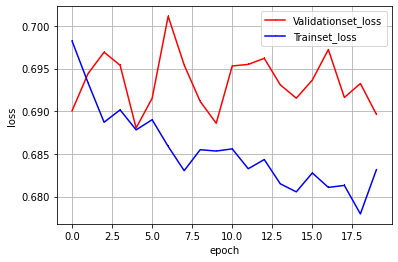

In [ ]:
print("\n 정확도 : %.4f" % (model.evaluate(x_valid, y_valid)[0]))

y_test_loss = history.history['val_loss']
y_train_loss = history.history['loss']

x_len = np.arange(len(y_test_loss))
plt.plot (x_len, y_test_loss, marker=',', c='red', label='Validationset_loss')
plt.plot(x_len, y_train_loss, marker=',', c='blue', label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
test_label.shape

(93, 2)

In [ ]:
model.predict(test_feature)

array([[0.50085396, 0.499146  ],
       [0.50574046, 0.49425948],
       [0.5063388 , 0.49366122],
       [0.5044292 , 0.49557075],
       [0.5038898 , 0.4961102 ],
       [0.5052166 , 0.49478346],
       [0.51522315, 0.48477685],
       [0.52567357, 0.4743264 ],
       [0.52421796, 0.47578207],
       [0.53520775, 0.46479225],
       [0.5499478 , 0.45005214],
       [0.5545359 , 0.44546407],
       [0.5519528 , 0.4480472 ],
       [0.5379444 , 0.46205565],
       [0.523598  , 0.47640195],
       [0.5149185 , 0.48508158],
       [0.50988454, 0.49011546],
       [0.50375116, 0.49624884],
       [0.49973744, 0.5002625 ],
       [0.48845622, 0.5115437 ],
       [0.4801552 , 0.5198448 ],
       [0.47077292, 0.5292271 ],
       [0.46859384, 0.5314061 ],
       [0.4702081 , 0.5297919 ],
       [0.47029617, 0.5297038 ],
       [0.4736733 , 0.5263267 ],
       [0.47722912, 0.5227709 ],
       [0.48341542, 0.51658463],
       [0.49198738, 0.50801265],
       [0.50370216, 0.49629787],
       [0.

* https://data-panic.tistory.com/33

In [ ]:
preds = np.argmax(model.predict(test_feature), axis=1)
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

In [ ]:
pd.get_dummies(preds)

,0,1
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
88,0,1
89,0,1
90,0,1
91,0,1


In [ ]:
pred = model.predict(test_feature)

pred.shape

(70, 2)

In [ ]:
pred

array([[1.4115504e-02, 9.8588449e-01],
       [9.5378512e-01, 4.6214905e-02],
       [9.9978083e-01, 2.1916980e-04],
       [9.9999928e-01, 7.0426461e-07],
       [9.9981314e-01, 1.8687287e-04],
       [9.9729306e-01, 2.7069072e-03],
       [2.5116560e-01, 7.4883443e-01],
       [1.5793423e-03, 9.9842072e-01],
       [3.4282643e-02, 9.6571732e-01],
       [9.6638620e-01, 3.3613831e-02],
       [3.9385343e-01, 6.0614657e-01],
       [2.2466503e-01, 7.7533495e-01],
       [2.6263669e-01, 7.3736334e-01],
       [4.3195349e-01, 5.6804651e-01],
       [1.5128808e-01, 8.4871197e-01],
       [6.6645998e-01, 3.3353999e-01],
       [9.9512684e-01, 4.8730951e-03],
       [1.3626511e-03, 9.9863738e-01],
       [9.1684616e-01, 8.3153822e-02],
       [9.8194718e-01, 1.8052842e-02],
       [9.9057394e-01, 9.4260173e-03],
       [9.9632287e-01, 3.6771917e-03],
       [9.9794775e-01, 2.0522831e-03],
       [9.9971837e-01, 2.8159074e-04],
       [9.9652511e-01, 3.4748721e-03],
       [2.1404448e-01, 7.

In [ ]:
pred = pd.get_dummies(preds)

pred.shape

(70, 2)

In [ ]:
pred

,0,1
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
65,0,1
66,0,1
67,0,1
68,0,1


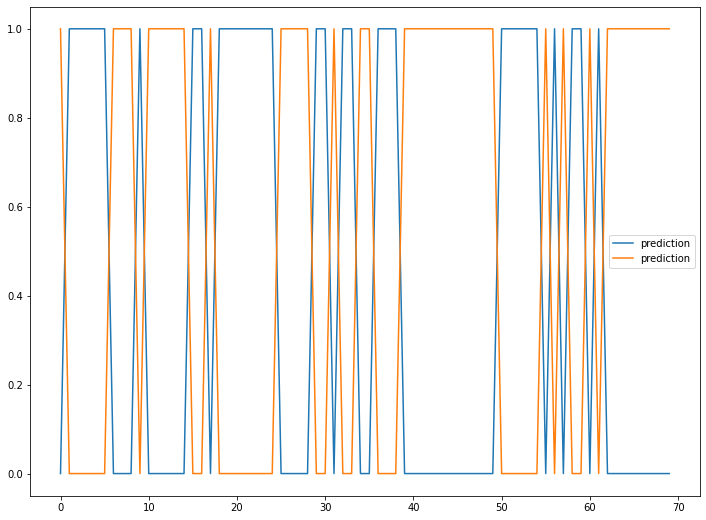

In [ ]:
plt.figure(figsize=(12, 9))
# plt.plot(test_label, label = 'actual')
plt.plot(pred, label = 'prediction')
plt.legend()
plt.show()

In [ ]:
test_label1 = np.array(test_label).argmax(axis=1)
pred1 = np.array(pred).argmax(axis=1)

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(test_label1, pred1)

array([[14, 22],
       [17, 17]])

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

p = precision_score(test_label1, pred1)
print(p)

r = recall_score(test_label1, pred1)
print(r)

f1 = f1_score(test_label1, pred1)
print(f1)

0.4358974358974359
0.5
0.4657534246575343


성능지표

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import sklearn.metrics as mt

# 성능지표
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score 
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [ ]:
test_label1 = np.array(test_label).argmax(axis=1)

#성능평가
print('accuracy',mt.accuracy_score(test_label1,preds))
print(confusion_matrix(test_label1, preds))
print(classification_report(test_label1, preds))

accuracy 0.4946236559139785
[[13 33]
 [14 33]]
              precision    recall  f1-score   support

           0       0.48      0.28      0.36        46
           1       0.50      0.70      0.58        47

    accuracy                           0.49        93
   macro avg       0.49      0.49      0.47        93
weighted avg       0.49      0.49      0.47        93



# LSTM 뉴스 기사 분류

In [ ]:
# 뉴스 데이터 분류
# https://blog.naver.com/PostView.nhn?blogId=htk1019&logNo=221255254613

from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
from keras.preprocessing import sequence
from keras.utils import np_utils

import numpy
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.datasets import reuters
(X_train, Y_train), (X_test, Y_test) = reuters.load_data(num_words=1000,test_split=0.2)

# 리스트를 (samples, maxlen) 크기의 2D 정수 텐서로 변환합니다.
x_train = sequence.pad_sequences(X_train, maxlen=100)
x_test = sequence.pad_sequences(X_test, maxlen=100)

y_train = np_utils.to_categorical(Y_train)
y_test = np_utils.to_categorical(Y_test)

In [ ]:
x_train.shape

(8982, 100)

In [ ]:
y_train, y_train.shape

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32), (8982, 46))

Embedding()는 (number of samples, input_length)인 2D 정수 텐서를 입력받아

Embedding()은 워드 임베딩 작업을 수행하고 (number of samples, input_length, embedding word dimentionality)인 3D 텐서를 리턴

In [ ]:
# https://subinium.github.io/Keras-6-1/

model = Sequential()
model.add(Embedding(1000,100))  # 단어의 개수 (각각의 단어 전체의 수), 임베딩한 후의 벡터의 크기 (행열같은 차원을 의미) : 열의 차원

# Embedding 층의 출력 크기는 (samples, maxlen, 100)가 됩니다., maxlen은 사용할 텍스트의 길이

model.add(LSTM(100, activation='tanh'))
model.add(Dense(46, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, batch_size=100, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
90/90 [==============================] - 21s 234ms/step - loss: 1.6085 - accuracy: 0.5845 - val_loss: 1.6551 - val_accuracy: 0.5806
Epoch 2/20
90/90 [==============================] - 20s 226ms/step - loss: 1.5361 - accuracy: 0.6043 - val_loss: 1.5942 - val_accuracy: 0.5890
Epoch 3/20
90/90 [==============================] - 20s 227ms/step - loss: 1.4493 - accuracy: 0.6328 - val_loss: 1.5003 - val_accuracy: 0.6215
Epoch 4/20
90/90 [==============================] - 20s 227ms/step - loss: 1.3640 - accuracy: 0.6553 - val_loss: 1.4203 - val_accuracy: 0.6474
Epoch 5/20
90/90 [==============================] - 20s 226ms/step - loss: 1.2759 - accuracy: 0.6738 - val_loss: 1.3856 - val_accuracy: 0.6541
Epoch 6/20
90/90 [==============================] - 20s 225ms/step - loss: 1.2087 - accuracy: 0.6969 - val_loss: 1.3814 - val_accuracy: 0.6496
Epoch 7/20
90/90 [==============================] - 20s 224ms/step - loss: 1.1540 - accuracy: 0.7093 - val_loss: 1.3006 - val_accuracy: 0.6741

In [ ]:
print("\n 정확도 : %.4f" % (model.evaluate(x_test, y_test)[1]))

y_test_loss = history.history['val_loss']
y_train_loss = history.history['loss']

x_len = numpy.arange(len(y_test_loss))
plt.plot (x_len, y_test_loss, marker=',', c='red', label='Testset_loss')
plt.plot(x_len, y_train_loss, marker=',', c='blue', label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

SyntaxError: ignored

VAR